<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Byan Alfredo Solorzano Montero<br>

Fecha: 04/08/2022

# Importación de librerias necesarias

In [60]:
import glob
import os
import re
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
from matplotlib import pyplot
from skimage.io import imread
from keras.preprocessing import image
1

from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el Dataset

In [46]:
clases = ['AcostaNataly', 'ArielChabla', 'ArroboMercy', 'BarraganSteven', 'BorjaLeonardo',
          'Borrero Jorge', 'CedeñoHector', 'CevallosJoan', 'EnriquezSelena', 'EspinosaJordan',
          'GoyesAnthony', 'HerediaGenesis', 'LucioCarlos', 'LópezMelany', 'MasacheFernando',
          'MosqueraLucy', 'OlallaLuis', 'PauteKevin', 'PárragaMaríaJosé', 'RaymondDávila',
          'RivasSelena', 'RuizJose', 'SalazarJohana', 'SolórzanoBryan', 'WilmerSolano',
          'ZambranoJhon']
imagenes_ruta = '../origen'
train_ruta = os.path.join(imagenes_ruta)
class_names = os.listdir(imagenes_ruta)
class_names.sort()
print(class_names)

['AcostaNataly', 'ArielChabla', 'ArroboMercy', 'BarraganSteven', 'BorjaLeonardo', 'Borrero Jorge', 'CedeñoHector', 'CevallosJoan', 'EnriquezSelena', 'EspinosaJordan', 'GoyesAnthony', 'HerediaGenesis', 'LucioCarlos', 'LópezMelany', 'MasacheFernando', 'MosqueraLucy', 'OlallaLuis', 'PauteKevin', 'PárragaMaríaJosé', 'RaymondDávila', 'RivasSelena', 'RuizJose', 'SalazarJohana', 'SolórzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [55]:
for class_name in class_names:
    cur_path = imagenes_ruta + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copiando imagen - {} en '/recursos/destino/' {}".format(element, class_name))
        src = os.path.join(imagenes_ruta + "/" + class_name + "/", element) # origen
        dst = os.path.join("../destino/" + class_name + "/", element) 
        shutil.copy(src, dst)

Copiando imagen - L00380424_1.jpg en '/recursos/destino/' AcostaNataly
Copiando imagen - L00380424_2.jpg en '/recursos/destino/' AcostaNataly
Copiando imagen - L00380424_3.jpg en '/recursos/destino/' AcostaNataly
Copiando imagen - L00376418_1.jpg en '/recursos/destino/' ArielChabla
Copiando imagen - L00376418_2.jpg en '/recursos/destino/' ArielChabla
Copiando imagen - L00376418_3.jpg en '/recursos/destino/' ArielChabla
Copiando imagen - L00385770_1.png en '/recursos/destino/' ArroboMercy
Copiando imagen - L00385770_2.png en '/recursos/destino/' ArroboMercy
Copiando imagen - L00385770_3.png en '/recursos/destino/' ArroboMercy
Copiando imagen - L00392978_1.png en '/recursos/destino/' BarraganSteven
Copiando imagen - L00392978_2.png en '/recursos/destino/' BarraganSteven
Copiando imagen - L00392978_3.png en '/recursos/destino/' BarraganSteven
Copiando imagen - L00393007_1.png en '/recursos/destino/' BorjaLeonardo
Copiando imagen - L00393007_2.png en '/recursos/destino/' BorjaLeonardo
Copi

In [48]:
train_data = []
for clase_tipo, sp in enumerate(clases):
    for file in os.listdir(os.path.join(train_ruta, sp+'/')):
        train_data.append(['{}/{}'.format(sp, file), clase_tipo, sp])
        
        clase_tipo = np.array(clase_tipo, dtype = 'float32')
        
data = pd.DataFrame(train_data, columns=['Imagen', 'Clase_ID','Clase_Tipo'])
data

,Imagen,Clase_ID,Clase_Tipo
0,AcostaNataly/L00380424_1.jpg,0,AcostaNataly
1,AcostaNataly/L00380424_2.jpg,0.0,AcostaNataly
2,AcostaNataly/L00380424_3.jpg,0.0,AcostaNataly
3,ArielChabla/L00376418_1.jpg,1,ArielChabla
4,ArielChabla/L00376418_2.jpg,1.0,ArielChabla
...,...,...,...
73,WilmerSolano/L00392980_2.jpeg,24.0,WilmerSolano
74,WilmerSolano/L00392980_3.jpeg,24.0,WilmerSolano
75,ZambranoJhon/L00392993_Centro.png,25,ZambranoJhon
76,ZambranoJhon/L00392993_LD.png,25.0,ZambranoJhon


In [49]:
long =len(data.index)

In [57]:
# put labels into y_train variable
y = data["Clase_Tipo"]
# Drop 'label' column
x = data.drop(labels = ["Clase_Tipo"],axis = 1) 

InvalidIndexError: (0, slice(None, None, None), slice(None, None, None), slice(None, None, None))

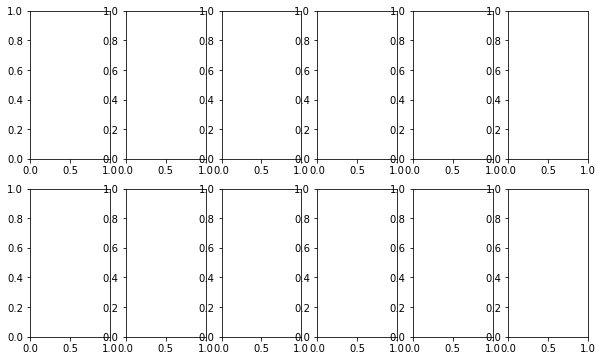

In [74]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(10, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout();

In [53]:
# visualize number of digits classes
Y.value_counts()

AcostaNataly        3
ArielChabla         3
WilmerSolano        3
SolórzanoBryan      3
SalazarJohana       3
RuizJose            3
RivasSelena         3
RaymondDávila       3
PárragaMaríaJosé    3
PauteKevin          3
OlallaLuis          3
MosqueraLucy        3
MasacheFernando     3
LópezMelany         3
LucioCarlos         3
HerediaGenesis      3
GoyesAnthony        3
EspinosaJordan      3
EnriquezSelena      3
CevallosJoan        3
CedeñoHector        3
Borrero Jorge       3
BorjaLeonardo       3
BarraganSteven      3
ArroboMercy         3
ZambranoJhon        3
Name: Clase_Tipo, dtype: int64

## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [3]:
#Código que responde a la descripción anterior

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [4]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)


## División del dataset en datos de entrenamiento y datos de test 

In [5]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Modelamiento

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 